Advanced Transport Phenomena, R
Chapter 2 Problem 32

A dynamic model for a tank with jacket cooling or heating. The mathematical representation for the fluid in the tank is the same with TS replaced by TC in Example 2.15 in the text,

where T is the average temperature in the tank.

An additional term due to heat generation can be added. This is (−ΔH)(−RA)V. However, this makes the model non-linear, and one also needs to set up a mass balance for the reacting species. The concepts and the method of analysis and model formulations are the same, except that more equations are involved and the numerical solution can be a challenging problem as well.
For the coolant we have


Note that the sign on the last term is now changed since the jacket is losing heat. The output variables are the vessel and jacket temperatures. The fluid in the jacket is assumed to be well mixed, which might not be a good assumption. Set up a case-study problem involving MATLAB simulation and test for some chosen parameter values. Consider both reacting and non-reacting systems.

In [20]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from ode_helpers import state_plotter

In [65]:
#Reactor parameters
dia=0.5
R=dia/2
H=0.5
vol=np.pi*R**2*H
U=120.0
A=2*np.pi*R*H
rho=1000
cp=2000
Delh=-250.0
mdot=.3
mdotc=.1
tinlet=350.
volj=vol/5
tinc=300
#Reaction parameters
A1=200
E=300
def f(t,Temp,c):
    dTdt=[
        (mdot*cp*(tinlet-Temp[0])-A1*np.exp(-E/Temp[0])*Delh+U*A*(Temp[1]-Temp[0]))/(rho*cp*vol) #???
        , (mdotc*cp*(tinc-Temp[1])-U*A*(Temp[1]-Temp[0]))/(rho*cp*volj)] #???
    return dTdt

In [66]:
# %% Define time spans, initial values, and constants
n = 20
tspan = np.linspace(0, 1000, n)
#Initial Conditions
Tinit = [350, 300]
c=[]

sol = solve_ivp(lambda t,Temp:f(t,Temp,c), [tspan[0],tspan[-1]],Tinit, t_eval = tspan)

if sol.status != 0:
    print("WARNING: sol.status is %d" % sol.status)
print(sol.message)

The solver successfully reached the end of the integration interval.


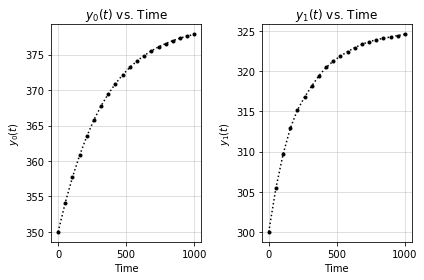

In [69]:
# %% Plot states
state_plotter(sol.t, sol.y, 0)